<a href="https://colab.research.google.com/github/sunna69/test/blob/main/Assignment_1_23_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avanced Automation - Assignment 1

To be delivered until 2023-12-10 23:59:59.

## Section 1 -- Linear Regression

**1.** Consider a dataset with 100 observations, containing a single predictor and a quantitative response. Two different models are fitted to the data, a linear regression ($m_1: Y = \beta_0 + \beta_1 X + \epsilon$) and a cubic regression ($m_2: Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1.a)** Suppose that the actual relation between X and Y is linear. Can the **training** residual sum of squares (RSS) of the linear model be expected to be smaller, larger or equal to the one from the cubic model? Or is there no information to tell? Justify your answer.

The cubic model might performe better on the TRAINING-data, resulting in a lower RSS on the training-data. This is because of the extra compexity, wich allows the model to capture noisy data, resulting in good RSS score on the training data, but not on unseen data. This means the m2 generalizes worse than m1.

**1.b)** Answer question 1.a) considering the test RSS rather than the training RSS.

The RSS on the test data is expected to be a smaller number from the m1 model, using linear regression, as this model is linear, and therefor maches the relation between X and Y (also linear). On the other hand, the second model, the cubic regression, will overfit, because it introduces unesssesary compexity to the solution. This complexity might make it look good in the training data, but generalizes poorly on unseen data.

**1.c)** Suppose that the actual relationship between X and Y is not linear, but it is not known how far it is from being linear. What is it expected of the the **training** RSS for the linear compared with the cubic models? Or is there not enough information? Justify your answer.

The cubic modelo will give the lowest RSS score, based on the same logic as before, the relationship between X and Y is linear enough that the cubic model will overfit and perform well on the seen training data. But if the relationship is not linear, the linear model will not be able to capture the true relationship in a good way.

**1.d)** Answer question 1.c) considering the test RSS rather than the training RSS.

here its not easy to give a straight answer. This is because there will be a point in the relationship between X and Y goes from being linear enough that the linear model will give a lower RSS score, based on the same logic as before, to the relationship being so unlinear that the linear model will not be able to capture the complexity of the relationship, so the cubic model will give the lower RSS score.

**2.** Consider now the Palmer Archipelago penguin data. It consists of physical measurements of male and female adult penguins from three species that live in three different islands of the Palmer Archipelago in Antarctica.

**2.a)** Load the dataset `penguins_size.csv`.

In [ ]:
import numpy as np
import pandas as pd

path = "/content/penguins_size.csv"
df = pd.read_csv(path)
#344 rows 7 columns

**2.b)** Discard any row that has a missing value.

In [ ]:
import numpy as np
import pandas as pd

path = "/content/penguins_size.csv"
df = pd.read_csv(path)
df = df.dropna()
print(df)
#333 rows 7 columns

    species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
4    Adelie  Torgersen              36.7             19.3              193.0   
5    Adelie  Torgersen              39.3             20.6              190.0   
..      ...        ...               ...              ...                ...   
338  Gentoo     Biscoe              47.2             13.7              214.0   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
0         37

**2.c)** How many penguins of each `species` and `sex` live in each `island`? Answer this question with `pandas`.

In [ ]:
import numpy as np
import pandas as pd

path = "/content/penguins_size.csv"
df = pd.read_csv(path)
df = df.dropna()
penguins_count = df.groupby(['island', 'sex', 'species']).size().reset_index(name='count')
print(penguins_count)

      island     sex    species  count
0     Biscoe  FEMALE     Adelie     22
1     Biscoe  FEMALE     Gentoo     58
2     Biscoe    MALE     Adelie     22
3     Biscoe    MALE     Gentoo     61
4      Dream  FEMALE     Adelie     27
5      Dream  FEMALE  Chinstrap     34
6      Dream    MALE     Adelie     28
7      Dream    MALE  Chinstrap     34
8  Torgersen  FEMALE     Adelie     24
9  Torgersen    MALE     Adelie     23


**2.d)** Plot a correlation matrix of the numerical columns (with a statistical significance of 0.1%).

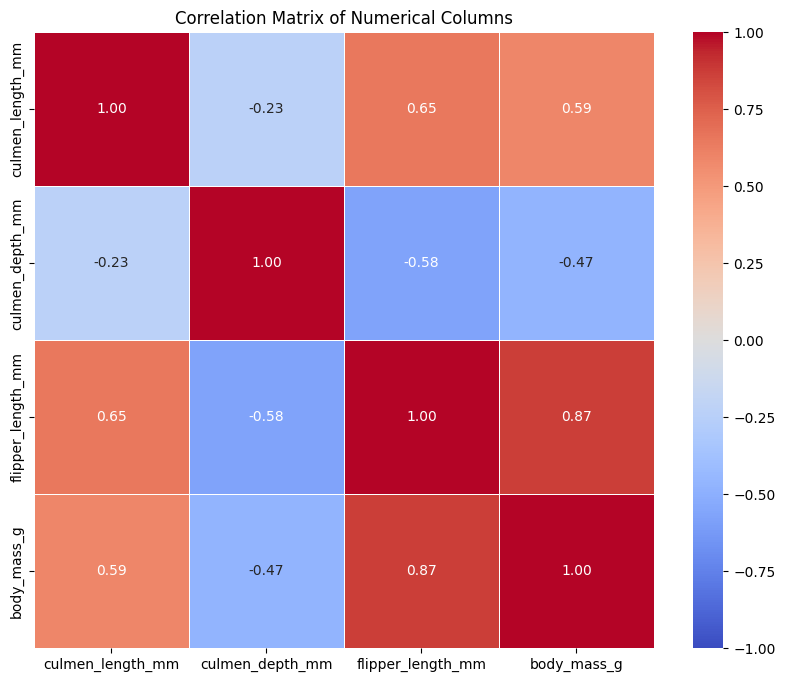

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = "/content/penguins_size.csv"
df = pd.read_csv(path)
df = df.dropna()

numerical_columns = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

**2.e)** Perform a simple linear regression considering `body_mass_g` as the response and `flipper_length_mm` as the predictor. Print the obtained model and the $R^2$. Explain why this is a good choice of predictor.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

path = "/content/penguins_size.csv"
df = pd.read_csv(path)
df = df.dropna()

X = df['flipper_length_mm']
Y = df['body_mass_g']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
print(model.summary())

'''
After fitting the model,
examining the R-squared value can give you an idea of how well
the model explains the variability in the response variable.
A higher R-squared value suggests a better fit. Our R-squared value
is quite high, which indicates a good choice.
'''


                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1060.
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          3.13e-105
Time:                        15:45:16   Log-Likelihood:                -2461.1
No. Observations:                 333   AIC:                             4926.
Df Residuals:                     331   BIC:                             4934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5872.0927    310.28

'\nAfter fitting the model,\nexamining the R-squared value can give you an idea of how well\nthe model explains the variability in the response variable.\nA higher R-squared value suggests a better fit. Our R-squared value\nis quite high, which indicates a good choice.\n'

**2.f)** Plot a scatter plot of the response and predictor, along with the regression line.

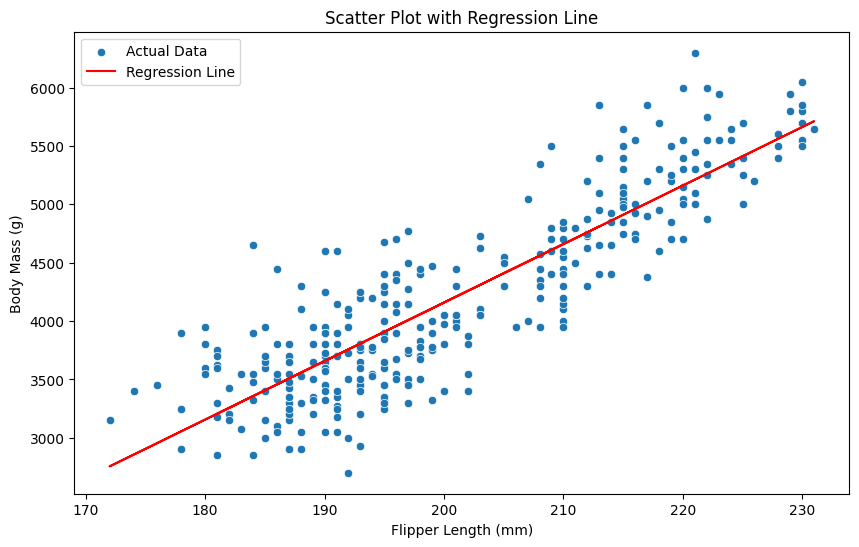

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

path = "/content/penguins_size.csv"
df = pd.read_csv(path)
df = df.dropna()

X = df['flipper_length_mm']
Y = df['body_mass_g']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predicted_values = model.predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['flipper_length_mm'], y=Y, label='Actual Data')
plt.plot(X['flipper_length_mm'], predicted_values, color='red', label='Regression Line')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Scatter Plot with Regression Line')
plt.legend()
plt.show()

**2.g)** A baby penguin has a flipper length of around 50 mm. What is the predicted value of the body mass of a baby penguin? Comment on the prediction of the model.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

path = "/content/penguins_size.csv"
df = pd.read_csv(path)
df = df.dropna()

X = df['flipper_length_mm']
Y = df['body_mass_g']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
new_data = pd.DataFrame({'const': 1, 'flipper_length_mm': [50]})
predicted_body_mass = abs(model.predict(new_data))

print(f"The predicted body mass for a baby penguin with a flipper length of 50 mm is approximately {predicted_body_mass.iloc[0]:.2f} grams.")



The predicted body mass for a baby penguin with a flipper length of 50 mm is approximately 3364.43 grams.


**2.h)** Perform a multiple linear regression considering `body_mass_g` as the response and using all numerical predictors. Compare the $R^2$ of the simple linear regression model and the multiple linear regression model.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

path = "/content/penguins_size.csv"
df = pd.read_csv(path)
df = df.dropna()

X_multi = df.select_dtypes(include=['float64', 'int64']).drop(columns='body_mass_g')
X_multi = sm.add_constant(X_multi)
Y_multi = df['body_mass_g']

model_multi = sm.OLS(Y_multi, X_multi).fit()
print(model_multi.summary())

'''
R^2 of simple linear regression is 0.762,
while R^2 of multiple linear regression model is 0.764
'''


                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          9.26e-103
Time:                        15:45:16   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -6445.4760    566.13

'\nR^2 of simple linear regression is 0.762,\nwhile R^2 of multiple linear regression model is 0.764\n'

**2.g)** Perform a multiple  linear regression considering `body_mass_g` as the response and using all predictors. Comment on the $R^2$ of this model.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

path = "/content/penguins_size.csv"
df = pd.read_csv(path)
df = df.dropna()

Y = df['body_mass_g']
X = df.drop(columns=['body_mass_g'])
X = pd.get_dummies(X, drop_first=True)
X = sm.add_constant(X)

model_all = sm.OLS(Y, X).fit()
print(model_all.summary())

'''
R^2 is now 0.875, making it higher than the other options. A higher
R^2 score indicates a better fit.
'''

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     284.1
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          1.85e-141
Time:                        15:45:16   Log-Likelihood:                -2353.6
No. Observations:                 333   AIC:                             4725.
Df Residuals:                     324   BIC:                             4760.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1500.0291    575.82

'\nR^2 is now 0.875, making it higher than the other options. A higher\nR^2 score indicates a better fit.\n'

## Section 2 -- Classification

**3)** Suppose that a dataset is divided into two equally-sized training and test sets, and then try out two different classification procedures:

* The first is the logistic regression, obtaining an error rate of 20% on the training data and 30% on the test data.
* The second is a 1-nearest neighbors, with an average error rate (averaged over test and training datasets) of 18%.

Based on these results, which method is preferred for classifying new observations? Why?

Answer: We will choose the 1-nearest model. This model has a lower average error over both training and test data. The average is lower than both trainin- and test-error for the logistic regression modell. We do not know the training-error from the 1-nearest model, but it is reasonable to assume that the 1-nearest is better than the other model.

**4.a)** Consider again the penguins dataset. However, the objective now is to predict the `sex` of the penguin based on the other variables. Split the data into test and training datasets. Consider a test dataset comprised of 30% of the whole dataset.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder


path = "/content/penguins_size.csv"
df = pd.read_csv(path)
print(df.shape)
df = df.dropna()
print(df.shape)

X = df.drop('sex', axis=1)
y= df['sex']

# Separate numerical and categorical features
numerical_features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
categorical_features = ['species','island']
X_numerical = X[numerical_features]
X_categorical = X[categorical_features]

# Standardize numerical features
scaler = StandardScaler()
X_numerical_scaled = pd.DataFrame(scaler.fit_transform(X_numerical), columns=numerical_features)

# One-hot encode categorical features (to avoid introducing unintended relationships between categories, as if each class was one number 1,2,3)
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
X_categorical_encoded = pd.DataFrame(onehot_encoder.fit_transform(X_categorical), columns=onehot_encoder.get_feature_names_out(categorical_features))
X_processed = pd.concat([X_numerical_scaled, X_categorical_encoded], axis=1)

# Split the data. Training and test
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)




print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

(344, 7)
(333, 7)
Training set shape: (233, 8) (233,)
Test set shape: (100, 8) (100,)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**4.b)** Perform LDA on the training data in order to predict `sex` using the remaining variables. What is the test error of the model obtained?

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print()
print("LDA")
print("Test Accuracy:", accuracy_lda)
print("Test Error:", 1 - accuracy_lda)


LDA
Test Accuracy: 0.91
Test Error: 0.08999999999999997


**4.c)** Perform QDA on the training data in order to predict `sex` using the remaining variables. What is the test error of the model obtained?

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)
accuracy_qda = accuracy_score(y_test, y_pred_qda)
print()
print("QDA")
print("Test Accuracy:", accuracy_qda)
print("Test Error:", 1 - accuracy_qda)


QDA
Test Accuracy: 0.88
Test Error: 0.12


**4.d)** Perform logistic regression on the training data in order to predict `sex` using the remaining variables. What is the test error of the model obtained?

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print()
print("logreg")
print("Test Accuracy:", accuracy_logreg)
print("Test Error:", 1 - accuracy_logreg)


logreg
Test Accuracy: 0.89
Test Error: 0.10999999999999999


**4.e)** Perform naive Bayes on the training data in order to predict `sex` using the remaining variables. What is the test error of the model obtained?

In [ ]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred_nb = naive_bayes.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print()
print("Naive Bayes")
print("Test Accuracy:", accuracy_nb)
print("Test Error:", 1 - accuracy_nb)


Naive Bayes
Test Accuracy: 0.64
Test Error: 0.36


**4.f)** Perform KNN on the training data, with several values of K, in order to predict `sex`. What test errors are obtained? Which value of K seems to perform the best on this data set?

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k_values = [1, 2, 3, 4, 5]
test_errors = {}
print()
print("K-nearest")
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    test_error_knn = 1 - accuracy_knn
    test_errors[k] = test_error_knn
    print(f"K = {k}, Test Error: {test_error_knn}")
best_k = min(test_errors, key=test_errors.get)
print(f"Best K value: {best_k}")


K-nearest
K = 1, Test Error: 0.08999999999999997
K = 2, Test Error: 0.08999999999999997
K = 3, Test Error: 0.10999999999999999
K = 4, Test Error: 0.10999999999999999
K = 5, Test Error: 0.10999999999999999
Best K value: 1


**4.g)** Plot the ROC curve and calculate the area under curve (AUC) for the LDA, QDA, logistic regression, naive Bayes and for the best value of K for the KNN method. Compare the results.

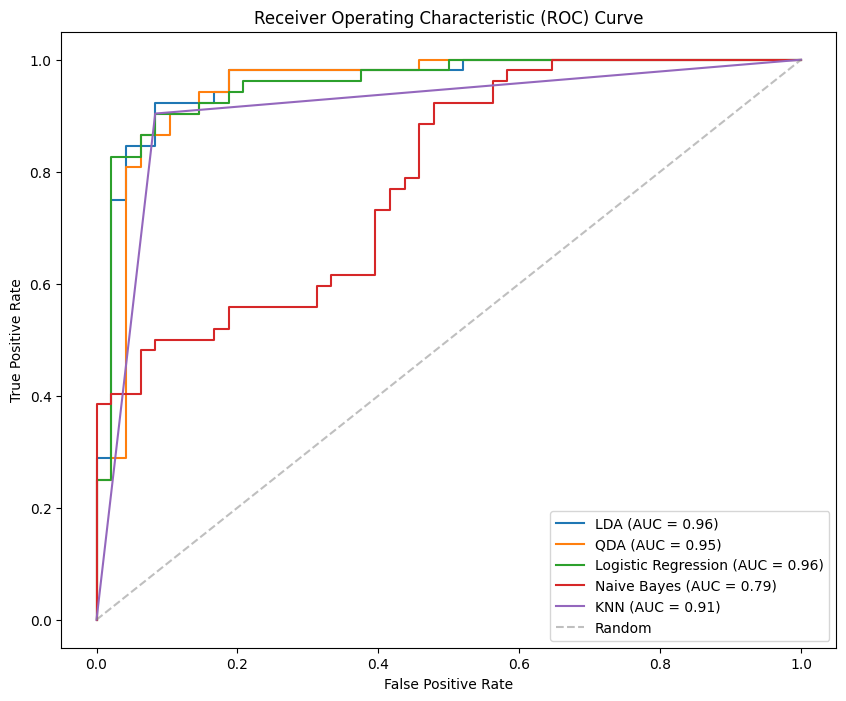

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

plt.figure(figsize=(10, 8))
for name, clf in zip(['LDA', 'QDA', 'Logistic Regression', 'Naive Bayes', 'KNN'], [lda, qda, logreg, naive_bayes, KNeighborsClassifier(n_neighbors=best_k)]):
    if name != 'KNN':
        clf = OneVsRestClassifier(clf)
    y_bin = label_binarize(y_test, classes=['FEMALE', 'MALE'])
    # Handle classifiers that have 'decision_function'
    try:
        y_score = clf.fit(X_train, y_train).decision_function(X_test)
    except AttributeError:
        # If no 'decision_function', use 'predict_proba'
        y_score = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Section 3 -- Bootstrap and k-Fold



```
# Dette er formatert som kode
```

**5.a)** Explain how k-fold cross-validation is implemented.

K-fold cross-validation is implemented by dividing the dataset into K subsets. Then it uses K-1 subsets for training and the last subset for testing. This process is repeated K times, with each subset used once as the test set. The model's performance is then averaged over the K iterations. This methode might give a more reliable estimate of performance.

**5.b)** What are the advantages and disadvantages of k-Fold cross-validation relative to:

1. Validation set approach.
2. Leave One Out Cross-Validation (LOOCV).

1: k_fold CV compared to validation set approach:
+ Pro: Gives a more realistic estimate of the performance by, because of the use of several test/train splits.
+ Pro: Variations in tha data will have a smaller impact on the perfomrnace measure because of the different slipts.
- Con: Higher comutational cost, because of several iterations

2: k-fold CV compared to Leave One Out CV:
+ Pro: k-folk has lower variance. This is because LOOCV has higher sensitivity to individual data points.
+ Pro: k-fold CV is less computationally expencive. Because LOOCV builds n models, insted of k models, as k-fold CV does (k<n).
- Con: k-fold may have a highe bias than LOOCV(tend to understate the performance more).



## Section 4 -- Other Questions

**6)** In your group's option, what are the advantages and disadvantages of using a virtual environment when programming in Python?

Advantages:
Working in a isolated virtual environment provides a structure to our group. It minimizes the dependency conlficts and ensures consistency across all stages of the development of this class assignement. Also, installation of packages and working with virtual environments is much easier this way.



Disadvantages: It was quite a learning curve for our group to work in a virtual environment. It took some time for our group to get used to the new environment. Another disadvantage is that it takes up a lot of disk space.
The IDE is less advanced. For example, when highlighting a variable, the IDE does not show all the other locations of this variable. Also, there is no autofill of code, etc.
Risky in case of deleting or losing code.



**7)** In your group's opinion, in what circumstances is it better to use Jupyter Notebooks and when is it better to use Google Colab notebooks? Give some specific examples.

It is better to use a Jupyter Notebook on local development, while Google colab is better for collaboratory work. An advantage with jupyter notebook is that it is easy to integrate with local tools. Google colab is still better when working with collaberatory work.

**8)** Enter your GitHub repository webpage.

In [ ]:
https://github.com/sunna69/AdvancedAutomation.git

SyntaxError: ignored